Exploratory Data Analysis of our data will be done. This will allow us to determine which factors may or may not have an impact on whether a person has Diabetes, Hypertension, and/or Stroke.

After we determine potential factors, we will then do machine learning to try and predict whether a person will have Diabetes, Hypertension, and Stroke based on the factors we have analyzed.

First we import packages for our analysis of the data and store our data in to a dataframe:

In [83]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn



In [84]:
url = 'health_data.csv'
da = pd.read_csv(url)

da.head()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,1.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0


In [85]:
da.describe()

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Diabetes,Hypertension,Stroke
count,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000,70692.000000
mean,8.584055,0.456997,0.525703,0.975259,29.856985,0.475273,0.147810,0.703036,0.611795,0.788774,0.042721,2.837082,3.752037,5.810417,0.252730,0.500000,0.563458,0.062171
std,2.852153,0.498151,0.499342,0.155336,7.113954,0.499392,0.354914,0.456924,0.487345,0.408181,0.202228,1.113565,8.155627,10.062261,0.434581,0.500004,0.495960,0.241468
min,1.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9.000000,0.000000,1.000000,1.000000,29.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.500000,1.000000,0.000000
75%,11.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,4.000000,2.000000,6.000000,1.000000,1.000000,1.000000,0.000000
max,13.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,1.000000,1.000000


We will then clean our data. First by finding incomplete data, then by finding duplicate data.

In [86]:
da.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Diabetes                0
Hypertension            0
Stroke                  0
dtype: int64

In [87]:
da.duplicated().sum()

6672

As we can see, there are no incomplete data in our dataset. In addition, we also see that we have 6672 duplicated rows. Although this is the case, without identification, we are not able to determine whether these rows are the same people or different people. So we will just leave the "duplicated" rows in our dataset and go on with our analysis with them.

Before we start our analysis, we need to make some assumptions about our data. The assumptions we are making is:
 * Data was collected through simple random sampling. Although this is unlikely to be the case, I am current unsure how to conduct statistics with complex samplings.
 * Population responses are approximately normal. In our case, the size of our data is 70692, so it is assumed it is normal

Now we can begin our analysis.

### AGE

Some questions we will try to answer are
 * Does age play a role as a risk factor in developing Diabetes, Hypertension, or Stroke?
 * Is there a significant difference between the population proportion of people having one of those health problems at their age group? 


<AxesSubplot: xlabel='Age', ylabel='Count'>

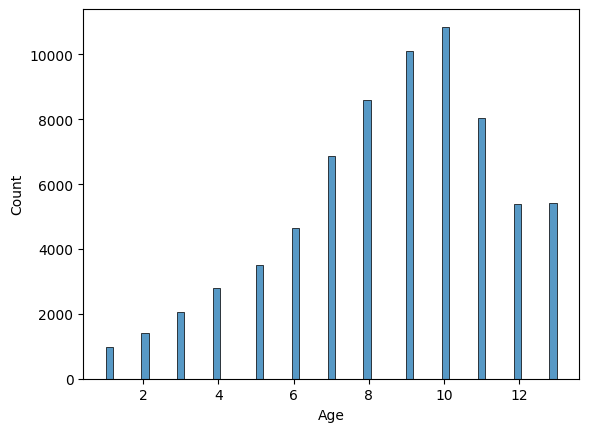

In [88]:
sns.histplot(x = 'Age', data = da)

In [89]:
da['Diabetes'] = da['Diabetes'].replace([0, 1], ['No', 'Yes'])
da['Hypertension'] = da['Hypertension'].replace([0, 1], ['No', 'Yes'])
da['Stroke'] = da['Stroke'].replace([0, 1], ['No', 'Yes'])

In [90]:
sns.histplot(x = 'Age', hue='Diabetes', multiple="dodge", data = da).set(title='Diabetics by Age')
plt.savefig('AgeDiabetes.jpg')
plt.close()



In [91]:
sns.histplot(x = 'Age', hue='Hypertension', hue_order = ['No', 'Yes'], multiple="dodge", data = da).set(title='Hypertension by Age')
plt.savefig('AgeHypertension.jpg')
plt.close()


In [92]:
sns.histplot(x = 'Age', hue='Stroke', multiple="dodge", data = da).set(title='Stroke by Age')
plt.savefig('AgeStrokes.jpg')
plt.close()


In [93]:
#Finding the Proportions.
diabetes = pd.crosstab(index=da['Age'], columns=da['Diabetes'], margins=True)
diabetes['Proportion in %'] = diabetes['Yes']/diabetes['All'] * 100
diabetes.reset_index(inplace=True)


ax = sns.barplot(data=diabetes, x= 'Age', y='Proportion in %', errwidth=0)
ax.bar_label(ax.containers[0], fmt='%.f%%')
plt.title("Proportion of Diabetics in that Age Group")
plt.savefig('AgeDiabeticProps.jpg')
plt.close()


In [96]:
hypertension = pd.crosstab(index=da['Age'], columns=da['Hypertension'], margins=True)
hypertension['Proportion in %'] = hypertension['Yes']/hypertension['All'] * 100
hypertension.reset_index(inplace=True)

ax = sns.barplot(data=hypertension, x= 'Age', y='Proportion in %', errwidth=0)
ax.bar_label(ax.containers[0], fmt='%.f%%')
plt.title("Proportion of Hypertension in that Age Group")
plt.savefig('AgeHyperProps.jpg')
plt.close()

In [97]:
stroke = pd.crosstab(index=da['Age'], columns=da['Stroke'], margins=True)
stroke['Proportion in %'] = stroke['Yes']/stroke['All'] * 100
stroke.reset_index(inplace=True)

ax = sns.barplot(data=stroke, x= 'Age', y='Proportion in %', errwidth=0)
ax.bar_label(ax.containers[0], fmt='%.f%%')
plt.title("Proportion of Stroke in that Age Group")
plt.savefig('AgeStrokeProps.jpg')
plt.close()

![](AgeDiabetes.jpg)  ![](AgeHypertension.jpg) ![](AgeStrokes.jpg)
 


## Proportions
![](AgeDiabeticProps.jpg) ![](AgeHyperProps.jpg) ![](AgeStrokeProps.jpg)

As we can see, as the people get older, both diabetes, hypertension, stroke increases in the age group. Both diabetes and hypertension are extremely similar when it comes to the proportion in the population in each age group. Stroke on the other hand, is much less common being at most 12% at age group 13 but the amount does increase with age albeit not as much when compared to diabetes and hypertension.